In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# previous task
url = "../Titanic.csv"
df = pd.read_csv(url)

df_cleaned = df.dropna()
cols_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']

df_cleaned = df_cleaned.drop(cols_to_drop, axis=1)
df_cleaned['Sex'] = df_cleaned['Sex'].map({'male': 0, 'female': 1})
df_cleaned['Embarked'] = df_cleaned['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

initial_rows = df.shape[0]
final_rows = df_cleaned.shape[0]
data_loss_percent = ((initial_rows - final_rows) / initial_rows) * 100
print(f"Dta loss: {data_loss_percent:.2f}%")

X = df_cleaned.drop('Survived', axis=1)
y = df_cleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

Dta loss: 79.46%
Model accuracy: 0.73


In [12]:
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    precision_recall_curve, 
    roc_curve, 
    auc
)
import seaborn as sns
import matplotlib.pyplot as plt

y_proba = clf.predict_proba(X_test)[:, 1]

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")

Precision: 0.74
Recall: 0.87
F1: 0.80


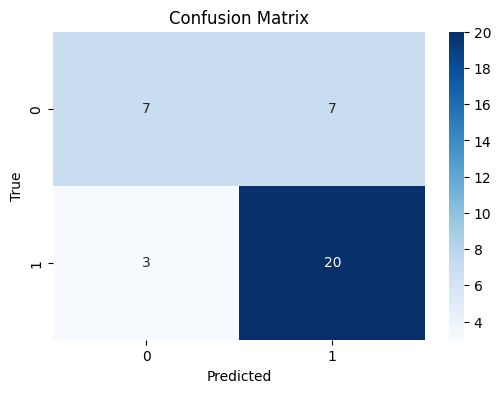

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

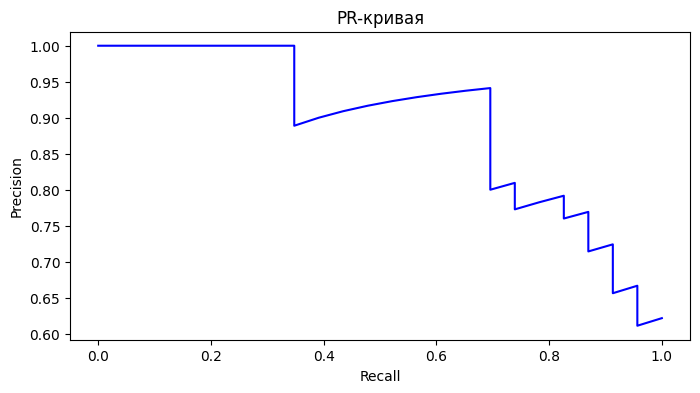

In [8]:
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 4))
plt.plot(recall_vals, precision_vals, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривая')
plt.show()

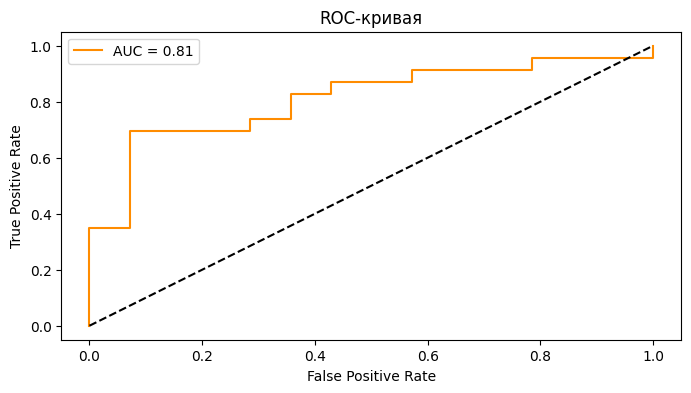

In [9]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()